In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Loading data

In [2]:
daily_activity = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_calories = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
daily_steps = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
hourly_calories = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
minute_calories_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')
minute_calories_wide = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv')
minute_intensities_wide = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv')
minuteMETs_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')
minute_sleep = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
minute_steps_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')
sleep_day = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log_info = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

# Self-defined functions

In [3]:
def plot_heatmap(corrmat, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title,fontsize=25)
    plt.yticks(rotation=0)
    plt.show()

# 1.Explore Daily acivity

In [4]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
daily_activity.shape

(940, 15)

There are 940 observations in the dataset

In [7]:
len(daily_activity['Id'].unique())

33

There are 33 participants in total 

In [8]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


## 1.1 The trend of daily activive distance over the week

Text(0, 0.5, 'Active Minutes')

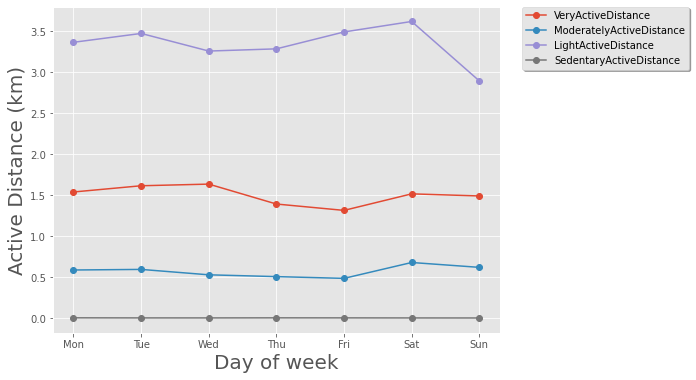

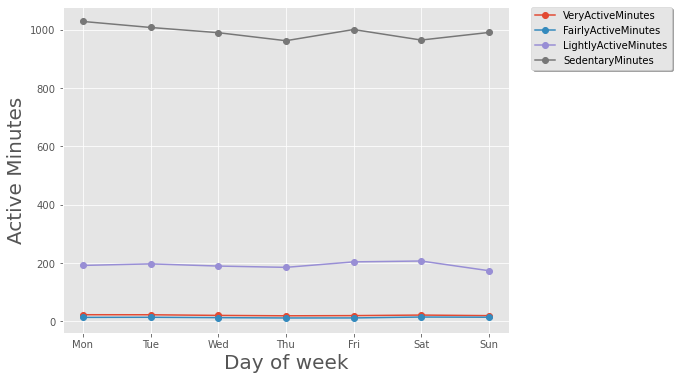

In [9]:
daily_activity.rename(columns={'ActivityDate': 'ActivityDay'},inplace=True)
daily_activity['DayOfWeek'] = pd.to_datetime(daily_activity['ActivityDay']).dt.dayofweek
daily_activity_dayofweek = daily_activity.drop('Id',axis=1).groupby('DayOfWeek').mean()
features_distance_interested = ['VeryActiveDistance',
                       'ModeratelyActiveDistance','LightActiveDistance',
                      'SedentaryActiveDistance']
features_minutes_interested = ['VeryActiveMinutes','FairlyActiveMinutes',
                      'LightlyActiveMinutes','SedentaryMinutes']
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
daily_activity_dayofweek['DayOfWeek'] = daily_activity_dayofweek.index
daily_activity_dayofweek['DayOfWeek'] = daily_activity_dayofweek['DayOfWeek'].apply(lambda x: days[x])
plt.figure(figsize=(8,6))
for feature in features_distance_interested:
    plt.plot(daily_activity_dayofweek['DayOfWeek'],daily_activity_dayofweek[feature],'-o')
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Active Distance (km)',fontsize=20)
plt.legend(labels=features_distance_interested,shadow=True,bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0)   
plt.figure(figsize=(8,6))
for feature in features_minutes_interested:
    plt.plot(daily_activity_dayofweek['DayOfWeek'],daily_activity_dayofweek[feature],'-o')
plt.legend(labels=features_minutes_interested,shadow=True,bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0)
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Active Minutes',fontsize=20)

Light active distance is the major part of all active distances. People tend to be more active on Saturdays as the rise from Friday to Saturday can be seen from all the three active cases (LightActiveDistance,VeryActiveDistance,ModeratelyActiveDistance). In terms of time as unit of minutes, people spend most time on sedentary activities everyday for the whole week. The time people spend on different activities stays steady over the week.

##  1.2 Components of active distance

[None, None, None]

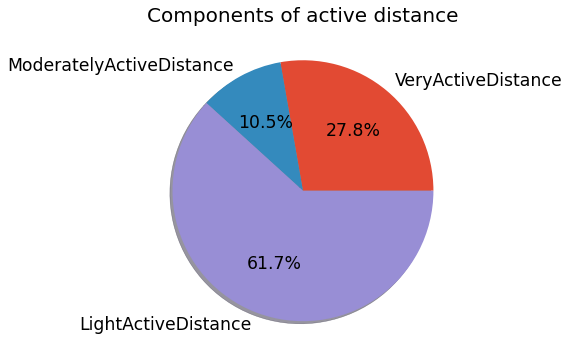

In [10]:
plt.figure(figsize=(8,6))
component_activity = [daily_activity['VeryActiveDistance'].mean(),daily_activity['ModeratelyActiveDistance'].mean(),
              daily_activity['LightActiveDistance'].mean()]
labels = ['VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance']
patches,texts,autotexts = plt.pie(component_activity,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Components of active distance",fontsize=20)
[x.set_fontsize('xx-large') for x in autotexts]
[x.set_fontsize('xx-large') for x in texts]
#pd.Series(autotexts).apply(lambda x:x.set_fontsize('xx-large'))

As an auxillary analysis of activie distance, the pie chart shows the proportion each active distance occupies. 
Light active distance occupies more than a half. It is the major daily activity people engage in.

## 1.3 Correlation analysis

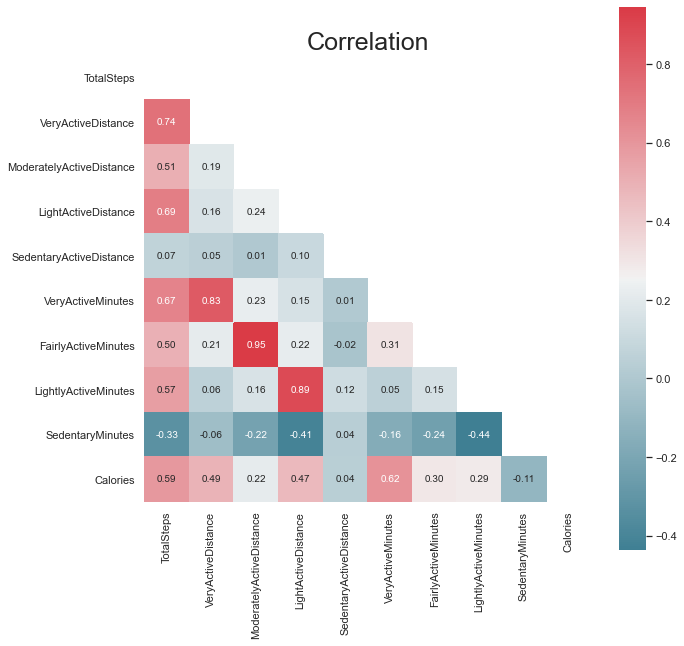

In [11]:
features_selected = [
                     'TotalSteps','VeryActiveDistance','ModeratelyActiveDistance',
                     'LightActiveDistance','SedentaryActiveDistance',
                    'VeryActiveMinutes','FairlyActiveMinutes',
                    'LightlyActiveMinutes','SedentaryMinutes','Calories']
plot_heatmap(daily_activity[features_selected].corr(),'Correlation')

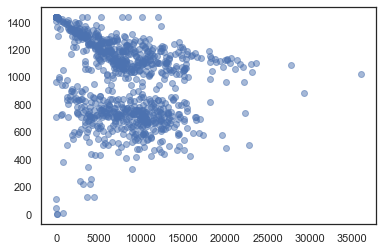

In [12]:
plt.scatter(daily_activity['TotalSteps'],daily_activity['SedentaryMinutes'],alpha=0.5)

It seems no obvious relationships between 'total steps' and 'sedentary minutes'. They are two separate varibles

The calories burnt everyday is highly related to very active minutes

# 2 Explore Sleep day

In [13]:
sleep_day.shape

(413, 5)

In [14]:
len(sleep_day.Id.unique())

24

There are less participants in sleep_day than daily_activity

In [15]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [16]:
sleep_day.drop('Id',axis=1).describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


## 2.1 Explore relationship between 'total minutes asleep' and 'total time in bed'

Text(0, 0.5, 'Total Time Asleep (Minutes)')

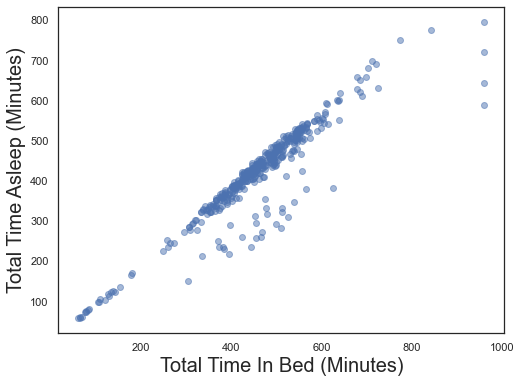

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(sleep_day['TotalTimeInBed'],sleep_day['TotalMinutesAsleep'],alpha=0.5)
plt.xlabel('Total Time In Bed (Minutes)',fontsize=20)
plt.ylabel('Total Time Asleep (Minutes)',fontsize=20)

It is a linear relationship between the two varibles as expected. It seems when total time in bed is spent over 800 minutes, the time people fall asleep within one day reduces. So the health advice of not spending too much time (the threshold is round 12 hours) in bed can be delivered to costomers who are using this smart device   

# 3 Explore relationship between sleep and daily activities

## 3.1 Merging two datasets

In [18]:
sleep_day.rename(columns={'SleepDay': 'ActivityDay'},inplace=True)
sleep_day['ActivityDay'] = pd.to_datetime(sleep_day['ActivityDay'])

In [19]:
daily_activity['ActivityDay'] = pd.to_datetime(daily_activity['ActivityDay'])

In [20]:
daily_activity_merged = daily_activity.merge(sleep_day,how='inner',on=['Id','ActivityDay'])

In [21]:
daily_activity_merged.shape

(413, 19)

In [22]:
daily_activity_merged.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,6,1,700,712


## 3.2 Correlation between time of being asleep and sedantary minutes

Text(0, 0.5, 'Total Time Asleep (Minutes)')

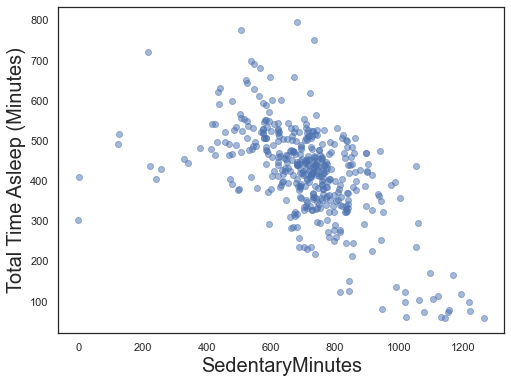

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(daily_activity_merged['SedentaryMinutes'],daily_activity_merged['TotalMinutesAsleep'],alpha=0.5)
plt.xlabel('SedentaryMinutes',fontsize=20)
plt.ylabel('Total Time Asleep (Minutes)',fontsize=20)

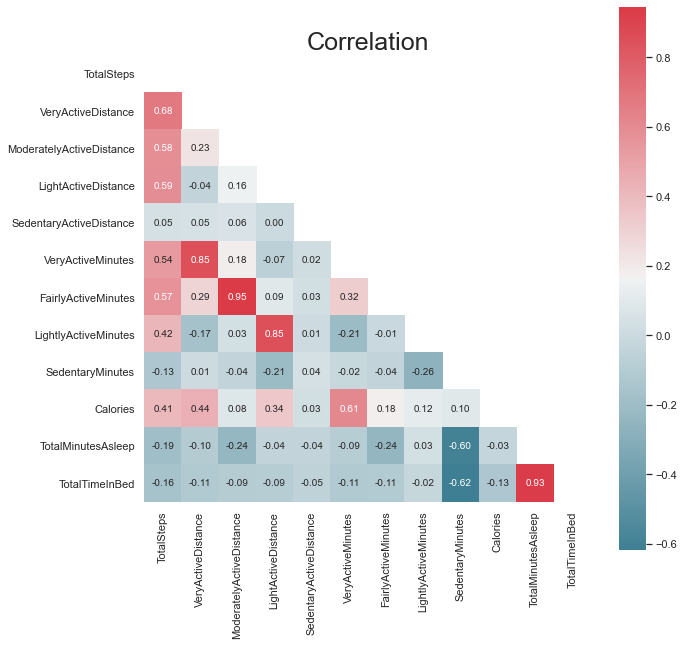

In [38]:
features_daily_activity_sleep = [
                     'TotalSteps','VeryActiveDistance','ModeratelyActiveDistance',
                     'LightActiveDistance','SedentaryActiveDistance',
                    'VeryActiveMinutes','FairlyActiveMinutes',
                    'LightlyActiveMinutes','SedentaryMinutes','Calories','TotalMinutesAsleep','TotalTimeInBed']
plot_heatmap(daily_activity_merged[features_daily_activity_sleep].corr(),'Correlation')

It is can be seen that the total minutes for being asleep is negtively correlated with sedentary minutes in one day. Health advices of avoiding too much sedentary time can be proposed to customers who are worried about their sleep quality. However, there is a threshold which is around 400 minutes above which there is an obvious negtive correlation between the two varibles.

## 3.3 Time for sleep over the week

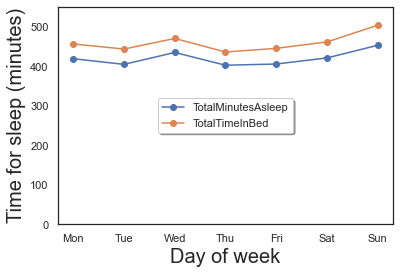

In [76]:
daily_activity_merged_dayofweek = daily_activity_merged[['TotalMinutesAsleep','TotalTimeInBed','DayOfWeek']].groupby('DayOfWeek').mean()
features_sleep = ['TotalMinutesAsleep','TotalTimeInBed']
daily_activity_merged_dayofweek['DayOfWeek'] = daily_activity_merged_dayofweek.index
daily_activity_merged_dayofweek['DayOfWeek'] = daily_activity_merged_dayofweek['DayOfWeek'].apply(lambda x: days[x])
for feature in features_sleep:
    plt.plot(daily_activity_merged_dayofweek['DayOfWeek'],daily_activity_merged_dayofweek[feature],'-o')
plt.ylim((0,550))
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Time for sleep (minutes)',fontsize=20)
plt.legend(labels=features_sleep,shadow=True,loc= 'center',borderaxespad=0)  

Users tend to have more sleep on Wednesdays (the middle of the week). There is a upward trend for the rest of the week (from Thursday to the weekend). 

439.03076923076924

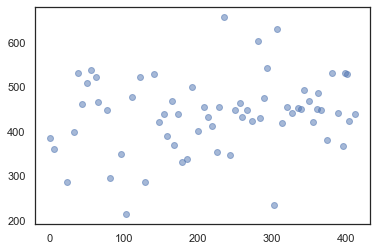

In [65]:
asleep_wed = daily_activity_merged[daily_activity_merged['DayOfWeek'] == 2]
from scipy import stats
asleep_wed = asleep_wed[(np.abs(stats.zscore(asleep_wed['TotalMinutesAsleep'])) < 3)]
plt.scatter(asleep_wed.index,asleep_wed['TotalMinutesAsleep'],alpha=0.5)
asleep_wed['TotalMinutesAsleep'].mean()